#                                   Customer Churn Analysis


Problem Statement:


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [32]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [33]:
#Import Dataset
df = pd.read_csv("Telecom_customer_churn.csv")

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
405,7606-BPHHN,Male,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1468.75,No
6708,2272-QAGFO,Female,1,No,No,14,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,1096.25,Yes
5096,0363-SVHYR,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.85,6263.8,No


In [36]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA(Exploratory Data Analysis)

In [37]:
#checking shape
df.shape

(7043, 21)

In [38]:
#checking columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
#description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Observations:-

In [41]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

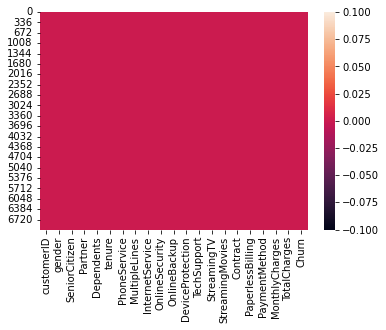

In [42]:
#null values using heatmap
sns.heatmap(df.isnull())

observation:- from the heatmap we can see that there is only one color in heatmap which means there is no null value in dataset.
    

# analyse target(churn)

In [43]:
df["Churn"].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

Observations:-

<AxesSubplot:xlabel='Churn', ylabel='count'>

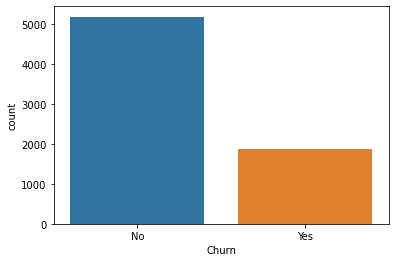

In [44]:
#count ploting of target variable for better understanding
sns.countplot(x=df["Churn"])

the countplot simply shows that the valuescount of churns are :No.we need smote.

# features(ploting and visualization)

In [45]:
def categorical(columns):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.pie(x = df[columns].value_counts(), labels = df[columns].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = columns, data = df, hue = "Churn")
    plt.show()
    print(df[columns].value_counts())

In [46]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

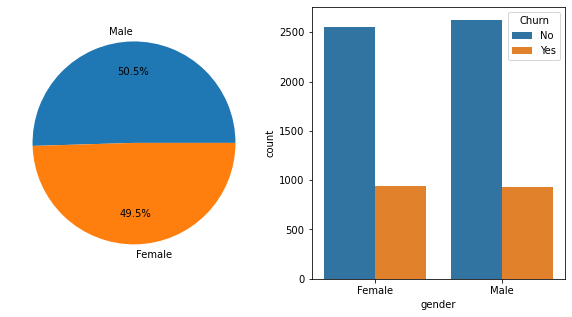

Male      3555
Female    3488
Name: gender, dtype: int64


In [47]:
#gender
categorical("gender")

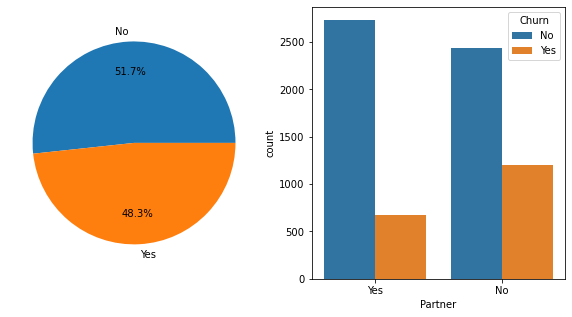

No     3641
Yes    3402
Name: Partner, dtype: int64


In [48]:
#Partner
categorical("Partner")

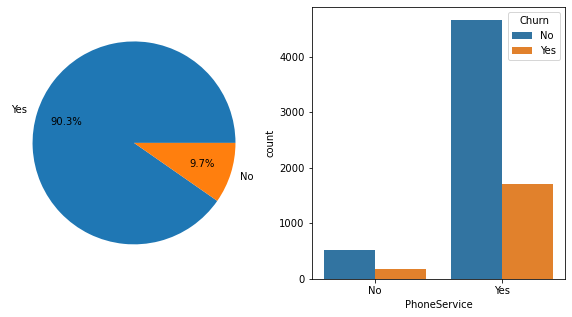

Yes    6361
No      682
Name: PhoneService, dtype: int64


In [49]:
categorical("PhoneService")

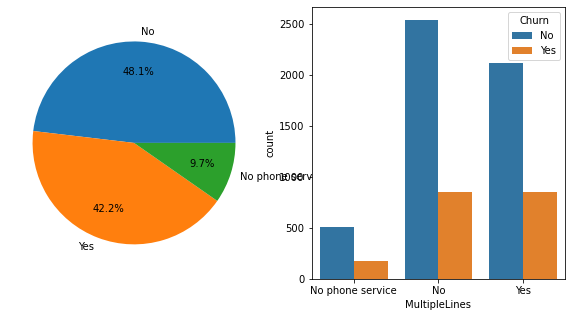

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [50]:
categorical("MultipleLines")

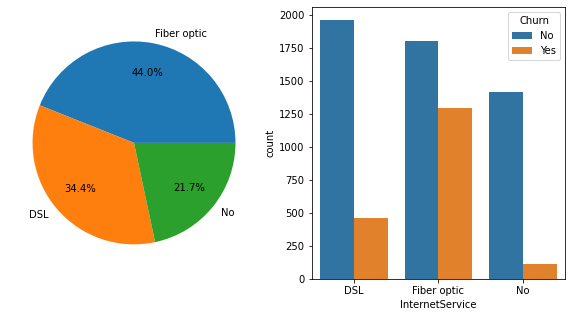

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


In [51]:
categorical("InternetService")

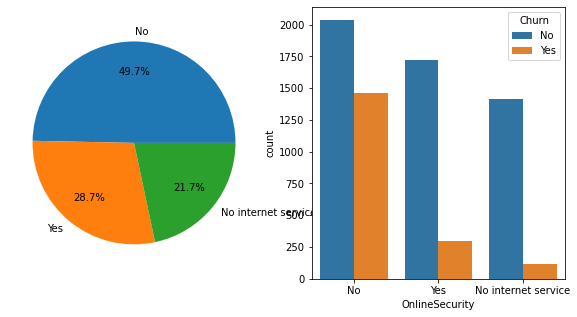

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [52]:
categorical("OnlineSecurity")

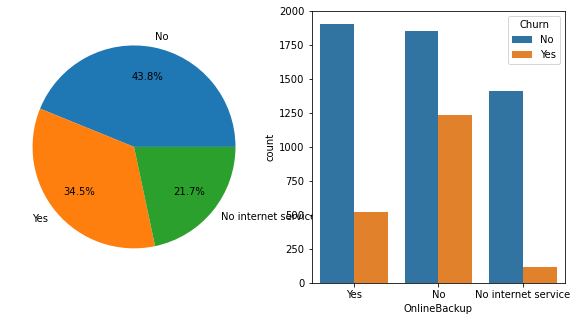

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [53]:
categorical("OnlineBackup")

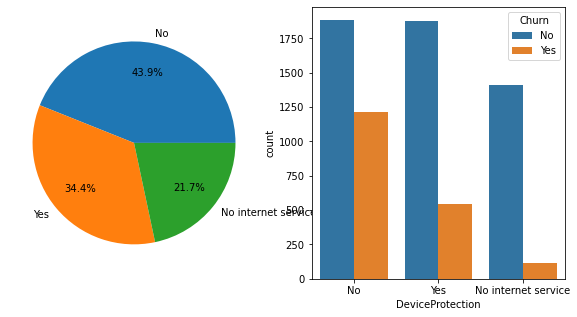

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [54]:
categorical("DeviceProtection")

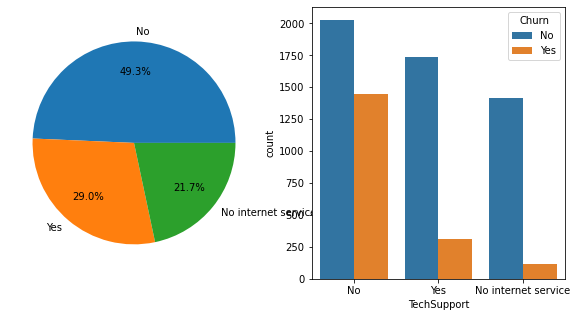

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [55]:
categorical("TechSupport")

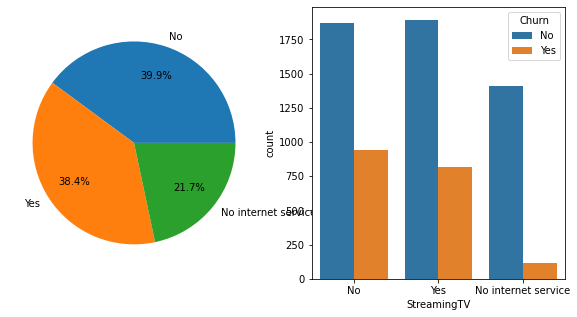

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [56]:
categorical("StreamingTV")

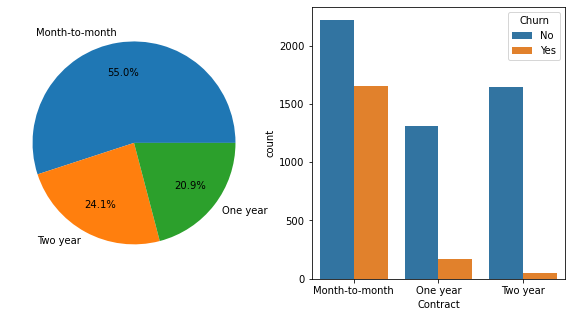

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [57]:
categorical("Contract")

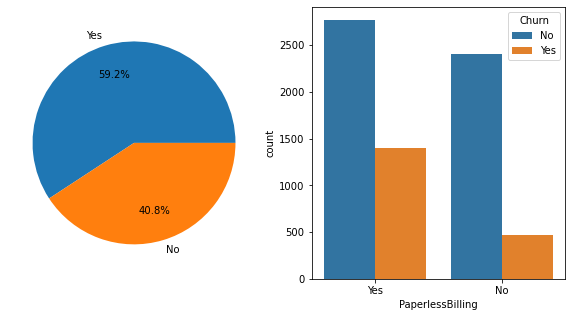

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [58]:
categorical("PaperlessBilling")

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

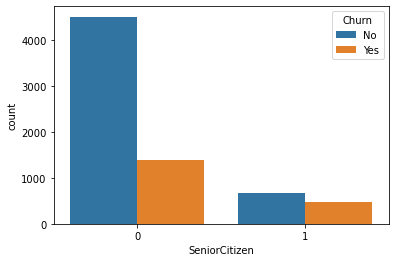

In [59]:
sns.countplot(x=df["SeniorCitizen"], data = df, hue = "Churn")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

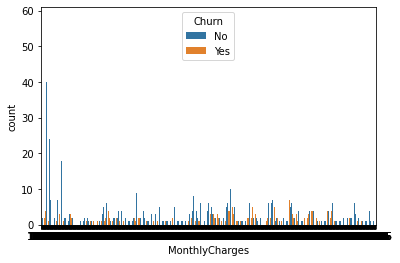

In [60]:
sns.countplot(x=df["MonthlyCharges"], data = df, hue = "Churn")

<AxesSubplot:xlabel='tenure', ylabel='count'>

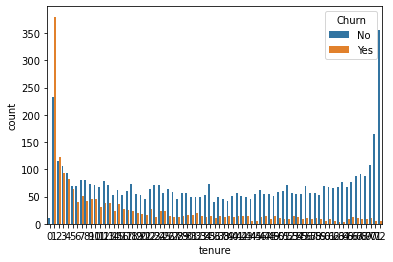

In [61]:
sns.countplot(x=df["tenure"],data = df, hue = "Churn")

In [62]:
# checking corrrelation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

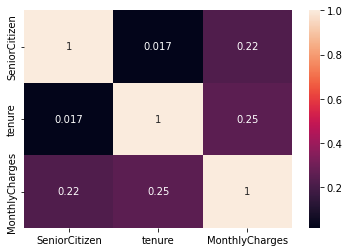

In [63]:
sns.heatmap(df.corr(),annot = True)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [66]:
#-dropping customr_id
df = df.drop('customerID' , axis = 1)

In [67]:
#checking the object type columns for visualization
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)   

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [68]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [69]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [70]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [71]:
x =df.drop('Churn', axis = 1)


In [72]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
dtype: float64

In [73]:
#-dropping customr_id
x = x.drop('PhoneService' , axis = 1)

In [74]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


# Transformation

In [75]:
# transforming
from sklearn.preprocessing import PowerTransformer
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x)

In [76]:
x_t

array([[ 0.00000000e+00, -0.00000000e+00,  6.27094866e-01, ...,
         1.90911361e+00,  2.48088564e+01,  3.27213595e+02],
       [ 7.13311790e-01, -0.00000000e+00, -0.00000000e+00, ...,
         2.82291866e+00,  4.53523631e+01,  2.25240220e+02],
       [ 7.13311790e-01, -0.00000000e+00, -0.00000000e+00, ...,
         2.82291866e+00,  4.30461301e+01,  4.68709046e+01],
       ...,
       [ 0.00000000e+00, -0.00000000e+00,  6.27094866e-01, ...,
         1.90911361e+00,  2.46143978e+01,  3.70474422e+02],
       [ 7.13311790e-01,  1.13718683e-01,  6.27094866e-01, ...,
         2.82291866e+00,  5.81785949e+01,  3.41185197e+02],
       [ 7.13311790e-01, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  8.06333231e+01,  5.58934398e+02]])

In [77]:
x_trans = pd.DataFrame(x_t , columns = x.columns)
x_trans

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.000000,-0.000000,0.627095,-0.000000,0.812271,0.669448,0.000000,-0.000000,1.101566,-0.00000,-0.00000,0.000000,0.000000,-0.000000,1.285461,1.909114,24.808856,327.213595
1,0.713312,-0.000000,-0.000000,-0.000000,8.707660,-0.000000,0.000000,0.841537,0.000000,1.09643,-0.00000,0.000000,0.000000,0.497288,0.000000,2.822919,45.352363,225.240220
2,0.713312,-0.000000,-0.000000,-0.000000,1.417776,-0.000000,0.000000,0.841537,1.101566,-0.00000,-0.00000,0.000000,0.000000,-0.000000,1.285461,2.822919,43.046130,46.870905
3,0.713312,-0.000000,-0.000000,-0.000000,10.127377,0.669448,0.000000,0.841537,0.000000,1.09643,0.85533,0.000000,0.000000,0.497288,0.000000,0.000000,34.363919,218.115750
4,0.000000,-0.000000,-0.000000,-0.000000,1.417776,-0.000000,0.792142,-0.000000,0.000000,-0.00000,-0.00000,0.000000,0.000000,-0.000000,1.285461,1.909114,55.479087,163.298535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.713312,-0.000000,0.627095,0.240981,7.181531,1.039873,0.000000,0.841537,0.000000,1.09643,0.85533,1.330917,1.354298,0.497288,1.285461,2.822919,65.715974,239.097589
7039,0.000000,-0.000000,0.627095,0.240981,12.957168,1.039873,0.792142,-0.000000,1.101566,1.09643,-0.00000,1.330917,1.354298,0.497288,1.285461,0.972608,78.892413,579.683754
7040,0.000000,-0.000000,0.627095,0.240981,4.550327,0.669448,0.000000,0.841537,0.000000,-0.00000,-0.00000,0.000000,0.000000,-0.000000,1.285461,1.909114,24.614398,370.474422
7041,0.713312,0.113719,0.627095,-0.000000,2.354360,1.039873,0.792142,-0.000000,0.000000,-0.00000,-0.00000,0.000000,0.000000,-0.000000,1.285461,2.822919,58.178595,341.185197


# scaling

In [78]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.40968472,
        -1.1585412 , -0.28254766],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.31889872,
        -0.23949171, -0.88438245],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.31889872,
        -0.34266505, -1.93709705],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.40968472,
        -1.16724064, -0.02722738],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.31889872,
         0.33431207, -0.20008892],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.48983732,
         1.33886338,  1.08504111]])

In [79]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-0.282548
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,-0.884382
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.937097
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,-0.926430
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.249955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,-0.802598
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.207501
7040,-1.009559,-0.439916,1.034530,1.529024,-0.725121,0.334585,-1.252568,1.258702,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.167241,-0.027227
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.200089


<AxesSubplot:>

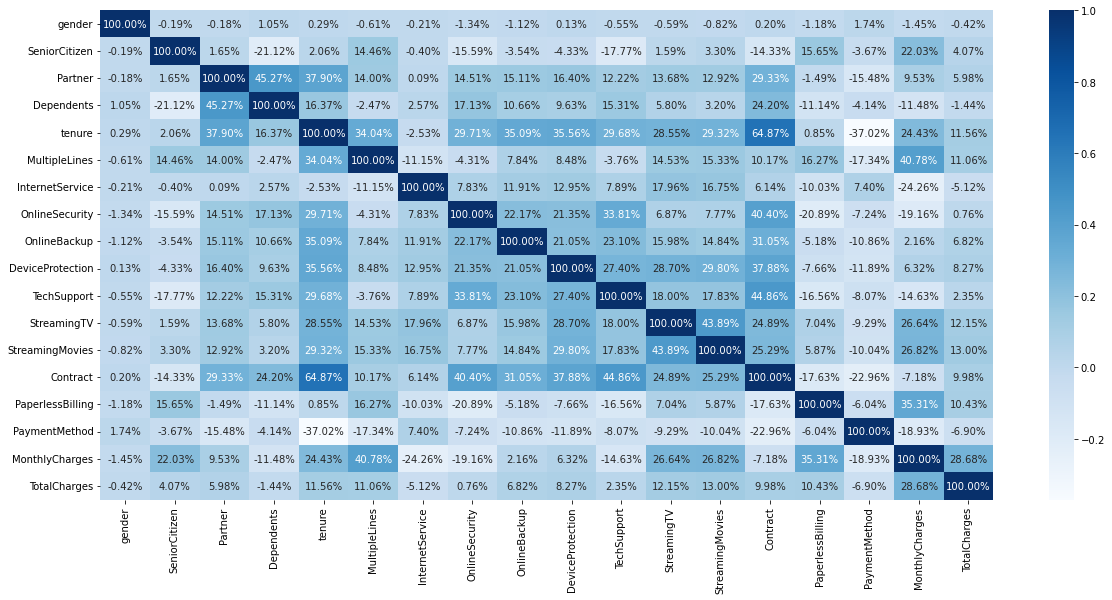

In [80]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Blues' , annot = True , fmt = '.2%')


# anaysing target variabe

In [81]:
## Target Variable
y = df.iloc[: , -1 :]

In [82]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [83]:
#Checking the count of Loan_Status

print(y.value_counts())


Churn
0        5174
1        1869
dtype: int64


In [84]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [85]:
#Rechecking the count of Loan_Status

print(y.value_counts())

Churn
0        5174
1        5174
dtype: int64


# modeling:-

In [87]:
#Importing Ml Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report

In [88]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8161030595813205  on Random_state  59


# 1.LogisticRegression

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.8161030595813205
[[1202  330]
 [ 241 1332]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1532
           1       0.80      0.85      0.82      1573

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



# Decision Tree Classifier


In [90]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8019323671497585  on Random_state  65


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.798389694041868
[[1217  330]
 [ 296 1262]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1547
           1       0.79      0.81      0.80      1558

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



# Support Vector Classifier


In [95]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.6096618357487923  on Random_state  94


In [96]:
#Calling each kernel by defining svmkernel:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = RS)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [97]:
svmkernel('linear')

0.8038647342995169
[[1206  331]
 [ 278 1290]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1537
           1       0.80      0.82      0.81      1568

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [98]:
svmkernel('poly')

0.5864734299516908
[[1426  111]
 [1173  395]]
              precision    recall  f1-score   support

           0       0.55      0.93      0.69      1537
           1       0.78      0.25      0.38      1568

    accuracy                           0.59      3105
   macro avg       0.66      0.59      0.54      3105
weighted avg       0.67      0.59      0.53      3105



In [99]:
svmkernel('rbf')

0.6096618357487923
[[997 540]
 [672 896]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      1537
           1       0.62      0.57      0.60      1568

    accuracy                           0.61      3105
   macro avg       0.61      0.61      0.61      3105
weighted avg       0.61      0.61      0.61      3105



# 4.4 Random Forest Classifier


In [100]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8589371980676328  on Random_state  79


In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8541062801932368
[[1332  216]
 [ 237 1320]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1548
           1       0.86      0.85      0.85      1557

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



# KNN Classifier

In [102]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7819645732689211  on Random_state  37


In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7819645732689211
[[1121  431]
 [ 246 1307]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1552
           1       0.75      0.84      0.79      1553

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



# As we can see that random forest classifer has more accuracy as comapre of others so we will select it as the best model.

In [111]:
#Final model as Random Forest
#{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)

Final_Model=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8457326892109501
[[1309  206]
 [ 273 1317]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1515
           1       0.86      0.83      0.85      1590

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



# AUC-ROC Curve


In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=Final_Model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.14833333, 1.        , 0.285     , ..., 0.99666667, 0.94666667,
       0.        ])

In [114]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

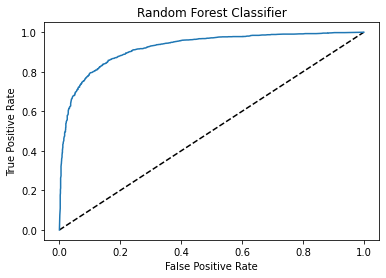

In [115]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [116]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

84.61641447163585


# Saving the Final_Model to pkl


In [117]:
import joblib
joblib.dump(Final_Model,'Customer_Churn_rf.pkl')

['Customer_Churn_rf.pkl']

<AxesSubplot:>

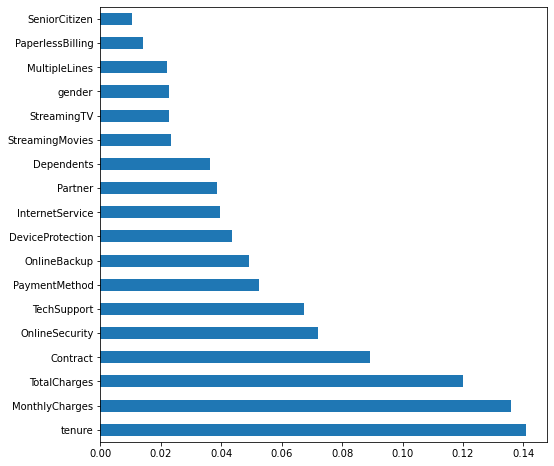

In [118]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,8))

In [119]:
# Loading the saved model
model=joblib.load("Customer_Churn_rf.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, ..., 1, 1, 0])

In [120]:
#saving as dataframe

base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction
base

,actual,predictions
3929,0,0
9287,1,1
602,0,0
7135,1,1
7365,1,1
...,...,...
5540,1,1
2853,0,0
9373,1,1
4139,0,1
